## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


## Visualizing the Data

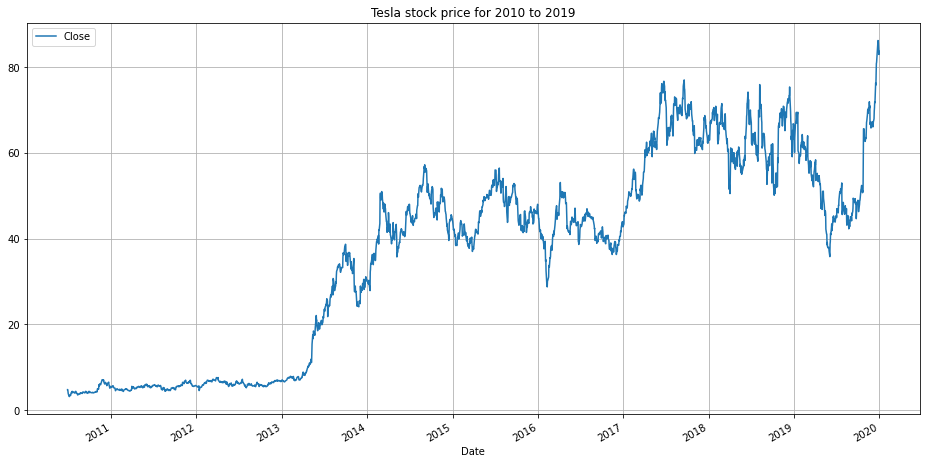

In [6]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

## Pre-processing

In [7]:
#Create the train and test data set

train_data = df[:1640] #From 2010 to 2016
test_data = df[1640:] #From 2017 to 2019

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

## Model Building

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#Using auto-arima to find best model without Seasonality
model = pm.auto_arima(train_ar, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0, D=0, start_Q=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# use adftest to find optimal 'd'
# maximum p and q
# frequency of series
# let model determine 'd'
# No Seasonality

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4212.496, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4210.134, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4210.549, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4210.525, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4209.287, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.048 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1640
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2103.643
Date:                Fri, 11 Dec 2020   AIC                           4209.287
Time:                        01:37:34   BIC                           4214.689
Sample:                             0   HQIC                          4211.290
                               - 1640                                       

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#Using auto-arima to find best model with Seasonality
model = pm.auto_arima(train_ar, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=True, start_P=0, D=0, start_Q=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# use adftest to find optimal 'd'
# maximum p and q
# frequency of series
# let model determine 'd'
# No Seasonality

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4212.496, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4210.134, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4210.549, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4210.525, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4209.287, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.103 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1640
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2103.643
Date:                Fri, 11 Dec 2020   AIC                           4209.287
Time:                        01:37:35   BIC                           4214.689
Sample:                             0   HQIC                          4211.290
                               - 1640                                       

## Using Best model:  ARIMA(0,1,0)(0,0,0)[0]

In [10]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

## Evaluate Performance

In [11]:
import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Square Error (MSE): '+str(mean_squared_error(test_ar, predictions)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(test_ar, predictions)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(test_ar, predictions))))

Mean Square Error (MSE): 3.3257541907590995
Mean Absolute Error(MAE): 1.2742915143421714
Root Mean Square Error (RMSE): 1.8236650434657948


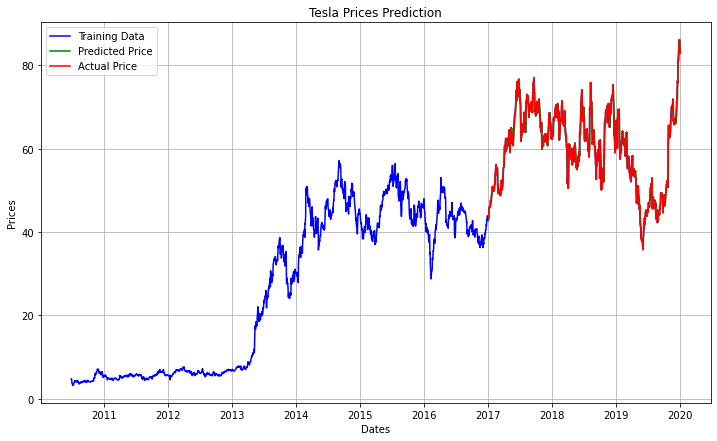

In [12]:
#Visualize the entire data

plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid()
plt.legend()

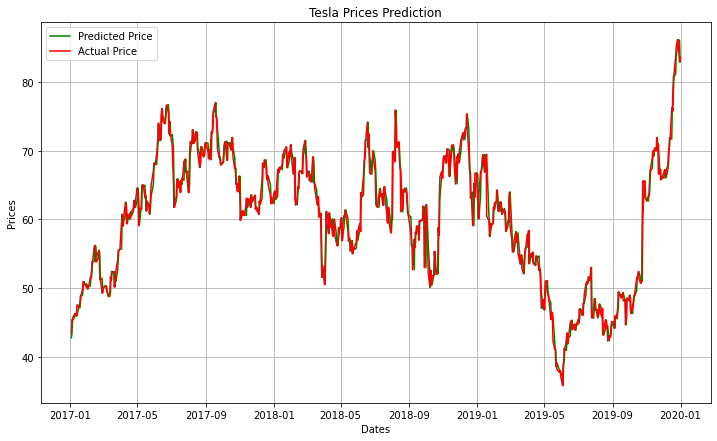

In [13]:
#Visualize the test data

plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid()
plt.legend()

In [14]:
train_data.describe()

,Close
count,1640.000000
mean,25.731901
std,18.663112
min,3.160000
25%,5.908000
50%,29.485000
75%,43.532499
max,57.208000


In [15]:
test_data.describe()

,Close
count,754.000000
mean,60.336284
std,9.314616
min,35.793999
25%,52.680999
50%,61.733002
75%,67.625999
max,86.188004


In [16]:
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


Made by: Hari N. Khatavkar

Credit: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/